1. Split data into two parts: train and test
2. First apply local outlier factor and isolation forest to generate four columns, two categorical and two continuous. These are all related to whether a sample is outlier or not.
3. Some Feature engineering
4. Oversampling by smotenc (apply only to the training data)
5. Random Forest

In [1]:
import pandas as pd

add="D:/datasets/kaggle/Credit Card Fraud Detection/creditcard.csv"
df=pd.read_csv(add, header=0, sep=',')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df.Class.value_counts().plot(kind='bar')
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
ratio=df.Class.value_counts()[1]/df.shape[0]

In [6]:
from sklearn.ensemble import IsolationForest

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from scipy.stats import skew, boxcox


In [9]:
#highly skewed data
skew(df.Amount)

16.97763503663315

In [10]:
#boxcox transformation to obtain best power
boxcox(df.Amount+10**(-50))[1]

0.11473731838330946

In [11]:
import numpy as np
df['Amount']=np.power(df.Amount.values,1/10)

df['zero_amount']=df.Amount.apply(lambda x:1 if x==0 else 0)
cols=df.columns
cols=list(cols[:-2])+['zero_amount','Class']
df=df[cols]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1] , test_size=0.2, shuffle=True, stratify=df.iloc[:,[-2,-1]] , random_state=42)

In [13]:
X_train['train_or_test']='train'
X_test['train_or_test']='test'

combined_data=pd.concat([X_train,X_test])
combined_data.index=list(range(combined_data.shape[0]))
combined_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,zero_amount,train_or_test
0,117414.0,2.068273,0.149566,-1.869443,0.180138,0.774777,-0.261994,0.120165,-0.099192,0.158409,...,-0.861989,0.259456,0.016327,-0.198828,0.181923,-0.062289,-0.044131,0.998995,0,train
1,49006.0,1.217395,0.175844,-0.121302,0.896018,0.243408,-0.025213,0.106033,-0.008298,0.136060,...,0.019652,-0.184452,-0.771907,0.695924,-0.246727,0.020564,0.010812,1.386794,0,train
2,151717.0,2.095008,0.178882,-2.153304,0.052211,1.004373,-0.146732,0.109007,-0.136661,-0.014666,...,0.634026,-0.067723,-0.206232,0.203524,0.682587,-0.061489,-0.051812,1.041380,0,train
3,139694.0,0.112047,0.628683,1.626282,1.115016,-0.498710,0.091193,-0.052250,-0.009620,-0.092020,...,1.095444,-0.173814,0.093874,-0.700194,0.980612,0.213387,0.183859,1.276644,0,train
4,33488.0,1.380650,-1.094097,0.515557,-1.264504,-1.549259,-0.731693,-0.918853,-0.152740,-1.900354,...,-0.054814,0.069342,0.383416,0.262416,-0.201262,0.040851,0.027759,1.482471,0,train
5,356.0,1.021392,0.155451,-0.312291,0.961407,0.548611,0.121816,0.525318,-0.053891,-0.686867,...,-0.850712,-0.077845,-0.679775,0.484478,-0.605930,-0.005454,0.019392,1.593960,0,train
6,132185.0,2.017760,0.041536,-1.195873,1.300416,0.399538,-0.148769,0.105584,-0.175281,0.611207,...,0.572394,-0.003616,0.511980,0.415293,-0.482131,0.022109,-0.043647,1.258799,0,train
7,165688.0,1.382815,-1.007931,-1.252942,1.270128,0.039660,0.471918,0.153921,0.007300,0.330864,...,0.196815,-0.138908,0.227959,-0.055349,-0.711173,-0.023714,0.008323,1.775089,0,train
8,86648.0,-1.597781,-0.080151,0.259743,-1.556867,1.420462,5.205158,1.718131,-0.748291,0.530779,...,-0.608515,0.164685,0.683522,0.366033,-0.466016,-0.441905,-0.617693,1.794404,0,train
9,43516.0,-0.935128,0.035938,1.583136,-0.813359,-1.458195,0.296044,-0.283878,0.714096,-1.756856,...,0.080773,0.229512,-0.041583,-0.056588,-0.213806,-0.084311,0.010748,1.635581,0,train


In [14]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score


In [15]:
#create two columns: one consisting of scores provided by isolation forest, other is categorical consisting of 1 or -1:
#1 denotes normal samples and -1 denotes outliers

isf=IsolationForest(n_estimators=300, contamination=ratio, max_samples=2000, max_features=0.8, random_state=34)
isf.fit(combined_data[combined_data.train_or_test=='train'].drop(labels='train_or_test',axis=1))
preds_train_if=isf.predict(combined_data[combined_data.train_or_test=='train'].drop(labels='train_or_test',axis=1))
preds_test_if=isf.fit_predict(combined_data[combined_data.train_or_test=='test'].drop(labels='train_or_test',axis=1))

scores_train_if=isf.decision_function(combined_data[combined_data.train_or_test=='train'].drop(labels='train_or_test',axis=1))
scores_test_if=isf.decision_function(combined_data[combined_data.train_or_test=='test'].drop(labels='train_or_test',axis=1))


combined_data.loc[combined_data.train_or_test=='train','outlier_or_not_by_IF']=preds_train_if
combined_data.loc[combined_data.train_or_test=='test','outlier_or_not_by_IF']=preds_test_if

combined_data.loc[combined_data.train_or_test=='train','scores_by_IF']=scores_train_if
combined_data.loc[combined_data.train_or_test=='test','scores_by_IF']=scores_test_if




D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [16]:
# we now repeat the above process by employing LOF instead of IF



In [17]:


from sklearn.neighbors import LocalOutlierFactor


In [18]:
        
    
    
lof=LocalOutlierFactor(novelty=True,n_neighbors=20, contamination=ratio)
lof.fit(combined_data[combined_data.train_or_test=='train'].drop(labels='train_or_test',axis=1))
train_labels=lof.predict(combined_data[combined_data.train_or_test=='train'].drop(labels='train_or_test',axis=1))
test_labels=lof.predict(combined_data[combined_data.train_or_test=='test'].drop(labels='train_or_test',axis=1))
train_scores=lof.score_samples(combined_data[combined_data.train_or_test=='train'].drop(labels='train_or_test',axis=1))
test_scores=lof.score_samples(combined_data[combined_data.train_or_test=='test'].drop(labels='train_or_test',axis=1))


In [19]:
combined_data.loc[combined_data.train_or_test=='train','outlier_or_not_by_LOF']=train_labels
combined_data.loc[combined_data.train_or_test=='test','outlier_or_not_by_LOF']=test_labels

combined_data.loc[combined_data.train_or_test=='train','scores_by_LOF']=train_scores
combined_data.loc[combined_data.train_or_test=='test','scores_by_LOF']=test_scores

In [20]:
#two columns named outlier_or_not_by_LOF and outlier_or_not_by_IF are categoricals


combined_data.loc[combined_data.outlier_or_not_by_IF==1,'outlier_or_not_by_IF']=0
combined_data.loc[combined_data.outlier_or_not_by_IF==-1,'outlier_or_not_by_IF']=1

combined_data.loc[combined_data.outlier_or_not_by_LOF==1,'outlier_or_not_by_LOF']=0
combined_data.loc[combined_data.outlier_or_not_by_LOF==-1,'outlier_or_not_by_LOF']=1

# conversion to categoricals

combined_data['outlier_or_not_by_IF']=combined_data['outlier_or_not_by_IF'].astype('category')
combined_data['outlier_or_not_by_LOF']=combined_data['outlier_or_not_by_LOF'].astype('category')


In [21]:
#oversampling

from imblearn.over_sampling import  SMOTENC

#our data contains both continuous and categorical features, so we choose SMOTENC instead of SMOTE



In [22]:
train=pd.get_dummies(combined_data[combined_data.train_or_test=='train'].drop(labels='train_or_test',axis=1),drop_first=True)
test=pd.get_dummies(combined_data[combined_data.train_or_test=='test'].drop(labels='train_or_test',axis=1),drop_first=True)


list_of_indices=[]  #collect column indices of categorical features 
for i,col in enumerate(train.columns):
    if train[col].nunique()==2:
        list_of_indices.append(i)

In [23]:
#create balance dataset so that fradulent and non-fradulent transactions have the same size

train_resampled, y_train_resampled =SMOTENC(k_neighbors=2,categorical_features=list_of_indices).fit_resample(train, y_train)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, accuracy_score, classification_report


In [260]:
# tuning the parameters of  random forest

from collections import OrderedDict

# aim is to optimize 'name_of_parameter'
def optimization_of_parameter_of_rf(X,y,dict_of_param,name_of_parameter, list_of_values, min_estimators, max_estimators):
    list_of_parameter_dicts=[(value,{**dict_of_param,**{'n_estimators':100, 'warm_start':True, 'oob_score':True,
                                 name_of_parameter:value}}) for value in list_of_values]
    
    #if x and y are two dictionaries, {**x,**y} is a way of merging these two
    
    ensemble_clfs = [( "{x}={y}".format(x=name_of_parameter, y=value), RandomForestClassifier(**param_dict))
                 for value, param_dict in list_of_parameter_dicts]

    # Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
    error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)



    for label, clf in ensemble_clfs:
        for i in range(min_estimators, max_estimators + 1):
            clf.set_params(n_estimators=i)
            clf.fit(X, y)

            # Record the OOB error for each `n_estimators=i` setting.
            oob_error = 1 - clf.oob_score_
            error_rate[label].append((i, oob_error))

    # Generate the "OOB error rate" vs. "n_estimators" plot.
    plt.figure(figsize=(15,8))
    for label, clf_err in error_rate.items():
        xs, ys = zip(*clf_err)
        plt.plot(xs, ys, label=label)

    plt.xlim(min_estimators, max_estimators)
    plt.xlabel("n_estimators")
    plt.ylabel("OOB error rate")
    plt.legend(loc="upper right")
    plt.show()

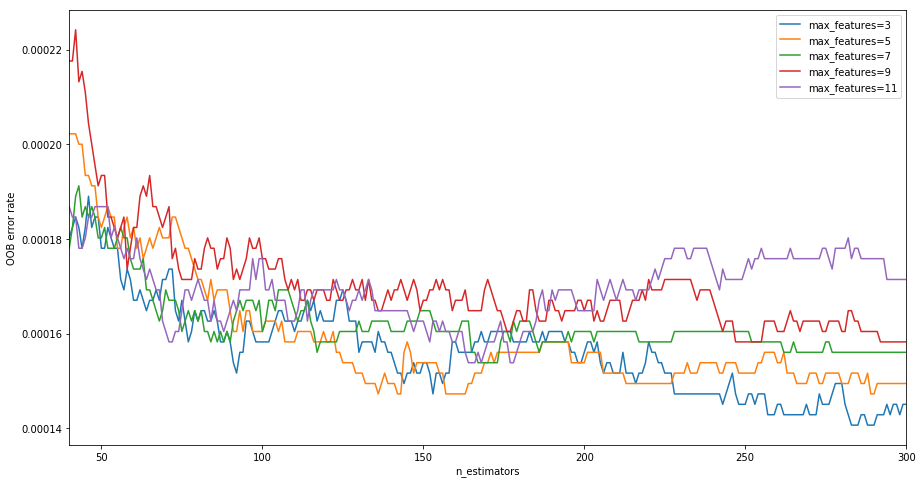

In [261]:
optimization_of_parameter_of_rf(train_resampled, y_train_resampled,{'min_samples_leaf':7},'max_features',[3,5,7,9,11],40,300)

In the above optimization process, the OOB scores are a bit misleading, because due to oversampling, 
there are too similar samples in training and oob parts, which leads to spurious improvement on oob scores. 
However, although oob scores are misleading, the comparison of different cases are real and reflect the truth.

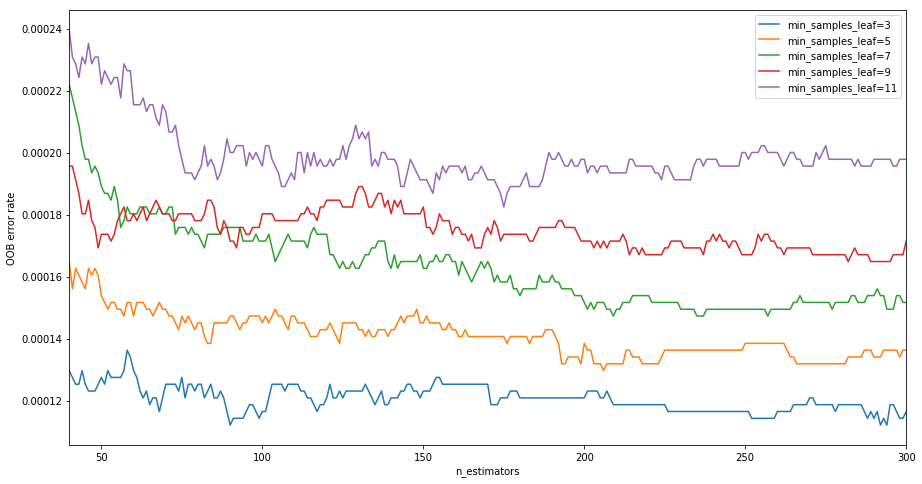

In [262]:
optimization_of_parameter_of_rf(train_resampled, y_train_resampled,{'max_features':3},'min_samples_leaf',[3,5,7,9,11],40,300)

In [263]:

rfc=RandomForestClassifier(n_estimators=300, max_features=3, min_samples_leaf=3)
rfc.fit(train_resampled, y_train_resampled)



print(recall_score(y_test,rfc.predict(test)))
print(accuracy_score(y_test,rfc.predict(test)))

0.8775510204081632
0.9995962220427653
